## Question 1

1. We are using Python program to create a "Russian Roulette" game, where one bullet is loaded in the chamber of a revolver, and the player is shooting himself in up to 6 rounds. If the player hits an empty shot, print the sound effect "click". If the player hit a lethal shot, then print "Bang" and terminate the game. The round of the lethal shot is determined by a random number, generated by the function `randint()` from the module "numpy.random". The help information of this function is given as follows.

```
randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
        If array-like, must contain integer values
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    dtype : dtype, optional
        Desired dtype of the result. Byteorder must be native.
        The default value is int.
    
        .. versionadded:: 1.11.0
    
    Returns
    -------
    out : int or ndarray of ints
        `size`-shaped array of random integers from the appropriate
        distribution, or a single such random int if `size` not provided.
```

Which of the following code is correct in creating the game? (Ans: B)

    A. 
```python
####################
import numpy as np

lethal_shot = np.random.randint(1, 7)
for n in range(6):
    if n < lethal_shot:
        print('Click!')
    else:
        print('Bang!')
        break
####################
```

    B.
```python
####################
import numpy as np

lethal_shot = np.random.randint(low=6)  # An integer from 0,1,2,3,4,5.
for n in range(6):                      # Iterate 0,1,2,3,4,5.
    if n < lethal_shot:
        print('Click!')                 # "Click" if lethal shot is not reached.
    else:
        print('Bang!')                  # "Bang" if lethal shot is reached; and `break`.
        break
####################
```

    C.
```python
####################
import numpy as np

lethal_shot = np.random.randint(1, 7)
for n in range(6):
    if n == lethal_shot:
        print('Bang!')
        break
    else:
        print('Click!')
####################
```

    D.
```python
####################
import numpy as np

lethal_shot = np.random.randint(high=6)
for n in range(6):
    if n == lethal_shot:
        print('Bang!')
        break
    else:
        print('Click!')
####################
```

**Solution:**

In [1]:
import numpy as np

lethal_shot = np.random.randint(low=6)  # An integer from 0,1,2,3,4,5.
print(f"Lethal shot: {lethal_shot}")
for n in range(6):                      # Iterate 0,1,2,3,4,5.
    if n < lethal_shot:
        print('Click!')                 # "Click" if lethal shot is not reached.
    else:
        print('Bang!')                   # "Bang" if lethal shot is reached; and `break`.
        break

Lethal shot: 4
Click!
Click!
Click!
Click!
Bang!


---

## Question 2

Suppose that the daily log returns on a stock are independent and normally distributed with mean 0.001 and standard deviation 0.015. If at time $t=1$, you buy $Q_1=\$1000$ worth of this stock, then after 50 trading days (e.g. $t=51$), the profit is expressed as $Q_{51} - Q_1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

1. (i) What is the probability that the profit is at least $\$120$? Use probability theory to calculate the exact value of the probability.

The summation of log returns of the 50 days are:

$$
z = \log\left(\frac{Q_{51}}{Q_1}\right) = \log\left(\frac{Q_2}{Q_1}\frac{Q_3}{Q_2}...\frac{Q_{51}}{Q_{50}}\right) = \log\left(\frac{Q_2}{Q_1}\right) + \log\left(\frac{Q_3}{Q_2}\right) + ... + \log\left(\frac{Q_{51}}{Q_{50}}\right) = r_2 + r_3 + ... + r_{51}~,
$$

where the random variable $z$ follows a normal distribution, and its mean and standard deviation can be calculated from the mean and standard deviation of the daily log returns.

**Solution**:

In [3]:
mean_z = 0.001 * 50
std_z = 0.015 * (50**0.5)

print(f'Mean the total return: {mean_z}')
print(f'Standard deviation of the total return: {std_z}')

Mean the total return: 0.05
Standard deviation of the total return: 0.10606601717798213


The required probability can be written as:

$$
\begin{align}
P(Q_{51} - Q_1 \geq 120) =& P(Q_{51} \geq Q_1 + 120) = P\left(\frac{Q_{51}}{Q_1} \geq 1 + \frac{120}{Q_1}\right) \\
=& P\left(\log\left(\frac{Q_{51}}{Q_1}\right) \geq \log\left(1 + \frac{120}{Q_1}\right)\right) \\
=& P\left(z\geq \log\left(1 + \frac{120}{Q_1}\right)\right) \\
=& P\left(z\geq \log\left(1 + \frac{120}{1000}\right)\right)\\
=& P\left(z\geq \log\left(1.12\right)\right),
\end{align}
$$

Write code to calculate the required probability.

**Solution:**

In [4]:
q1 = 1000
prob = 1 - norm.cdf(np.log(1+120/q1), mean_z, std_z)

print(f'Probability that profit is at least $120: {prob}')

Probability that profit is at least $120: 0.2752308001683129


1. (ii) What is the probability that the profit is at least $\$120$? Use Monte Carlo simulation with a sample size of 100,000 to find the approximated probability.

Note that the worth of the stock at time $t=51$ is written as:

$$
Q_{51} = Q_1\exp(r_2 + r_3 ... + r_{51})~,
$$

so we can generate random samples to represent the log returns of these 50 trading days for calculating the values of $Q_{51}$.

**Solution**:

In [5]:
smp_size = 100000
num_days = 50

q1 = 1000
log_returns = np.random.normal(0.001, 0.015, size=(smp_size, num_days))
q51 = q1 * np.exp(log_returns.sum(axis=1))

Write code to estimate the required probability using the sample proportion value.

**Solution:**

In [6]:
prob = (q51 - q1 > 120).mean()

print(f'Probability that profit is at least $120: {prob}')

Probability that profit is higher than $120: 0.27615


2. (i) Notice that the value of the stock at time $t$ can be written as $Q_t = Q_1 \exp(r_2 + r_3 + ... + r_{t-1} + r_t)$, Using the NumPy `cumsum()` function, generate a random sample of size 100,000 of daily stock values from $t=2$ to $t=51$.

_**Hint:** The sample of stock values will be a two-dimensional array, where its rows (axis 0) are each of the samples, and the columns (axis 1) represent the stock value on each of the trading days._

**Solution**:

In [20]:
smp_size = 100000
num_days = 50

q1 = 1000
log_returns = np.random.normal(0.001, 0.015, size=(smp_size, num_days))
qs = q1 * np.exp(np.cumsum(log_returns, axis=1))
qs.shape

(100000, 50)

2. (ii) Visualize the stock value trends of the first 10 records of ypur random sample.

**Solutiion:**

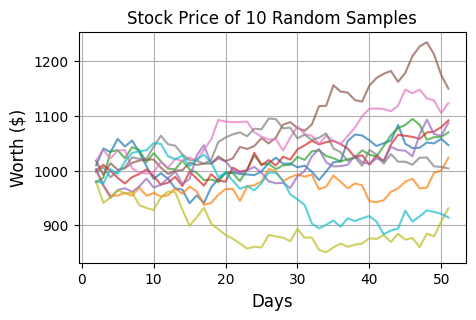

In [23]:
num_days = 51
days = np.arange(2, num_days+1)

plt.figure(figsize=(5,3))
for i in range(10):
    plt.plot(days, qs[i], alpha=0.7)

plt.title("Stock Price of 10 Random Samples")
plt.xlabel('Days', fontsize=12)
plt.ylabel('Worth ($)', fontsize=12)
plt.grid()
plt.show()

2. (iii) Use proper data visuals to compare the distributions of $Q_{21}$ and $Q_{51}$. 

**Solution**:

In [24]:
q21 = qs[:, 19]
q51 = qs[:, -1]

q21.min(), q51.min(), q21.max(), q51.max()

(769.2097274483418, 617.1411938643563, 1386.7486534893235, 1668.914522000899)

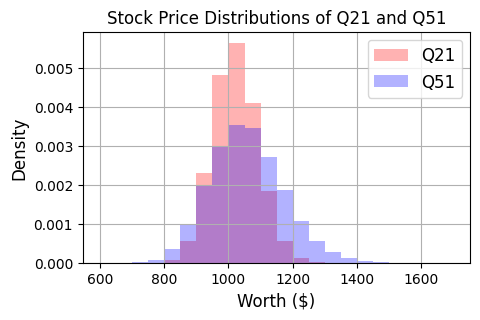

In [29]:
q21 = qs[:, 19]
q51 = qs[:, -1]

bins = np.arange(600, 1701, 50)
plt.figure(figsize=(5,3))
plt.title("Stock Price Distributions of Q21 and Q51")
plt.hist(q21, bins=bins, density=True, color='r', alpha=0.3, label='Q21')
plt.hist(q51, bins=bins, density=True, color='b', alpha=0.3, label='Q51')
plt.legend(fontsize=12)
plt.xlabel('Worth ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid()
plt.show()

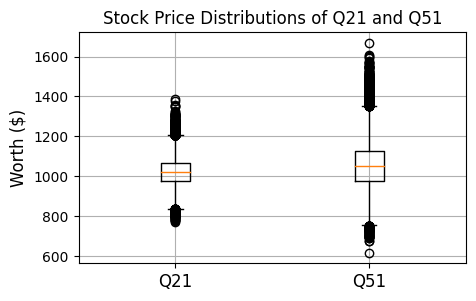

In [30]:
plt.figure(figsize=(5,3))
plt.title("Stock Price Distributions of Q21 and Q51")
plt.boxplot([q21, q51], labels=['Q21', 'Q51'])
plt.xticks(fontsize=12)
plt.ylabel('Worth ($)', fontsize=12)
plt.grid()
plt.show()

3. Does $Q_{51}$ follow a normal distribution? 

_**Hint:** Plot a Q-Q plot using `probplot()` from `scipy.stats`._

**Solution**:

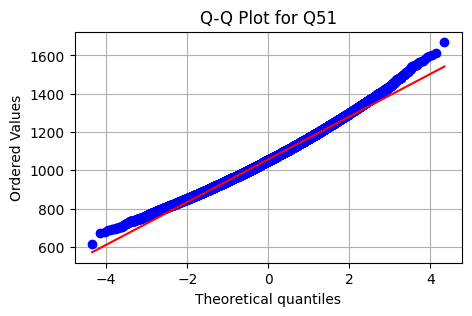

In [31]:
plt.figure(figsize=(5,3))
stats.probplot(q51, plot=plt)
plt.title(f'Q-Q Plot for Q51')
plt.grid()
plt.show()

# It can be seen that Q51 is not normally distributed. 

4. Now suppose you buy $\$10,000$ of this stock and used $\$1000$ of your own money and the other $\$9000$ in borrowed money. If the value of the stock falls below $\$9000$ at any trading day, then you have to sell the stock and repay the loan. What is the probability that the stock falls below $\$9000$ at any trading day between $t=2$ and $t=51$? Use Monte Carlo simulation with a sample size of 100,000.

_**Hint:** We are in fact looking for the probability that the minimum value of the stock within the 50 days is below $\$9000$._

**Solution**:

In [12]:
smp_size = 100000
days = 50

q1 = 10000                 
log_returns = np.random.normal(0.001, 0.015, size=(smp_size, days))
qs = q1 * np.exp(np.cumsum(log_returns, axis=1))

prob = (qs.min(axis=1) < 9000).mean()
print(f'Probability stock falls below $9000 at any trading day: {prob}')

Probability stock falls below $9000 at any trading day: 0.16036


---

## Question 3

Suppose that in Singapore, $p=0.62$ of all population prefer Coke over Pepsi, and the remaining $1-p=0.38$ prefer Pepsi over Coke. A local fast food company does not have the data, so they decide to randomly survey $n=50$ customers for their preference, and use the sample proportion $\hat{p}=\frac{m}{n}$ ($m$ is the number of surveyed customer who prefer Coke) to approximate the population parameter $p$. 

1. What is the expected value of the sample proportion $\hat{p}$?

The expected value:
$$
\mathbb{E}(\hat{p}) = \mathbb{E}\left(\frac{m}{n}\right) = \frac{\mathbb{E}(m)}{n}~,
$$

where $m$ follow a binomial distribution with $n$ experiments and the probability is $p$, so $\mathbb{E}(m) = np$.

Therefore, $\mathbb{E}(\hat{p})=p=0.62$

2. Plot the sampling distribution of the sample proportion $\hat{p}$. Then, using this sampling distribution, calculate the expected sample proportion.

Note that the variable $m$ follows a binomial distribution, the distribution of $\hat{p}=\frac{m}{n}$ also follows a binomial distribution, but all x-data are divided by $n$.

**Solution**:

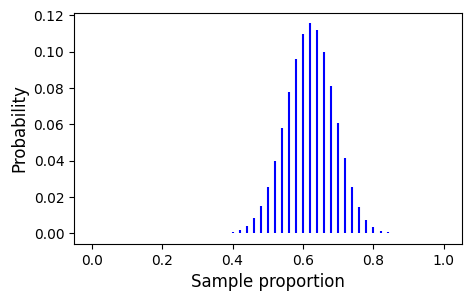

0.6199999999999997

In [13]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 50
p = 0.62

m = np.arange(0, n+1)
p_hats = m/n
pmf = binom.pmf(m, n, p)

plt.figure(figsize=(5,3))
plt.vlines(p_hats, 0, pmf, color='b')
plt.xlabel('Sample proportion', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid()
plt.show()

(pmf * p_hats).sum()